## Problem Definition

#### What is Reddit?
Reddit was founded by University of Virginia roommates Steve Huffman and Alexis Ohanian in 2005. Reddit is an American website where social news is gathered, and content is criticized. Members upload contents such as links, comments, images to the site. The posts are separated by user-created topics called as subreddits. These subreddits can be news, science, movies, music, books, video games and etc.
<br>
#### Motivation
Reddit is a social networking service. Reddit provides a list of Trending Threads in real time, but it is often hard to understand what these trending topics are about. It is important and necessary to classify these topics into general categories with high accuracy for better information retrieval.
<br>
#### Statement of the Problem
The enormous popularity of Reddit makes it a fascinating website for social analysis. With such many users writing comments and these comments can be associated with related thread in their respective subreddit. The primary motivation of this project is to gain better insight on what brings people together in online communities through sentiment analysis of subreddit comments through using deep learning algorithms.

#### What we expect from you in this assignment ?
We expect you to predict correct comments metas (topic of comment) from given data by modelling deep learning and nlp methodologies. 
Below, you can find the step by step guide of project.

#### If you have any questions about the assignment, you can contact us at the following e-mail addresses:

- cgdm.akyz@gmail.com
- ozgeflzcn@gmail.com




<a name="1"></a>
## 1 - Import Libraries 
-Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful): 


<li><a href = 'https://pandas.pydata.org/'>
Pandas
</a></li> 
<li><a href = 'https://numpy.org/'>
Numpy
</a></li> 
<li><a href = 'https://scikit-learn.org/'>
Sklearn 
</a></li> 
<li><a href = 'https://www.nltk.org/'>
nltk
</a></li> 
<li><a href = 'https://keras.io/'>
keras



<a name="2"></a>
## 2 - Importing the Data (65 points)


<a name="2-1"></a>
### 2.1 - Loading in the Data

Import the data set.  
- You have to import from 
<a href ='https://github.com/cigdemakyz/ITU_Odev'>
link




In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
import tensorflow
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [99]:
data = pd.read_csv("ITU_Odev_Data.csv")

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231460 entries, 0 to 231459
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  231460 non-null  int64 
 1   text        231460 non-null  object
 2   subreddit   231460 non-null  object
 3   meta        231460 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.1+ MB


<a name="2-2"></a>
### 2.2 - Exploratory Data Analysis (20 points)

Please investigate your data according to 
- Their distributions 
- Check null values
- Drop unnecessary columns 


In [101]:
print(f"Unique values of the unnamed column: {data['Unnamed: 0'].nunique()}")

Unique values of the unnamed column: 231460


Looks like Unnamed: 0 column is unnecesarry. We can drop it

In [102]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [103]:
data.head(5)

,text,subreddit,meta
0,lem me sing you the song of my people.. . w ^ ...,tf2,gaming
1,my friend has been insisting on tests for year...,youshouldknow,learning
2,i thought this was a subreddit simulator post ...,circlejerk,humor
3,definitely not blitzcrank getting free samples...,leagueoflegends,gaming
4,because low prio dont punish hard enough . val...,dota2,gaming


In [104]:
TARGET_COL = "meta"
FEATURES = list(data.drop(TARGET_COL,axis=1).columns)

In [105]:
FEATURES

['text', 'subreddit']

In [106]:
for feature in FEATURES:
    print(f"Null values of {feature} : {data[feature].isna().sum()}")

Null values of text : 0
Null values of subreddit : 0


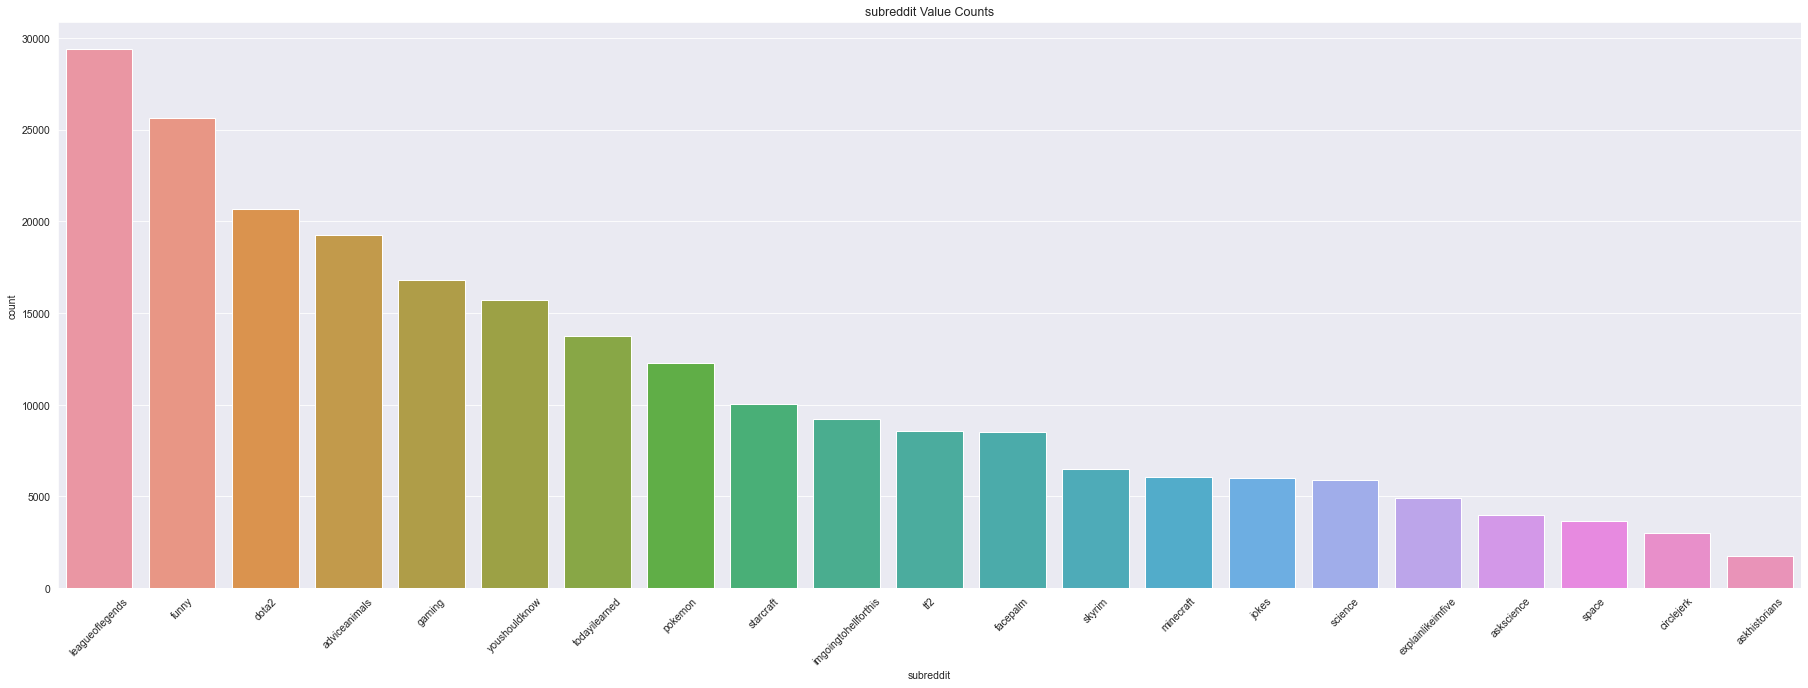

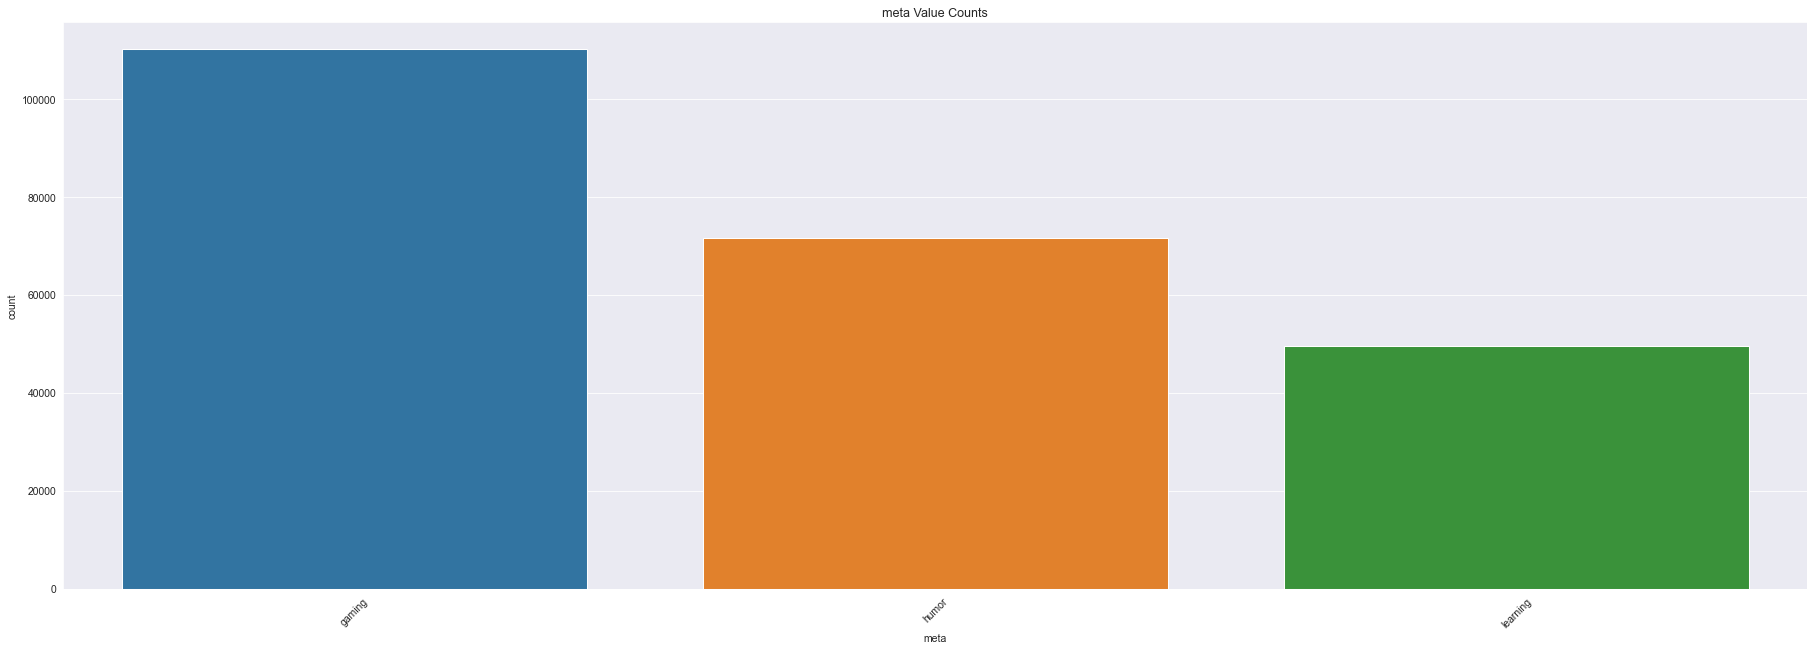

In [107]:
#Subreddit column stats
def get_countplot(data,col):

    
    plt.figure(figsize=(30,10),dpi=75)
    g = sns.countplot(x=col,data=data,order = data[col].value_counts().index)
    g.set_title(f"{col} Value Counts")
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    plt.show()

    return None


for col in ["subreddit","meta"]:
    get_countplot(data,col)

In [108]:
#Average length of a text in certain subreddits.

def get_avg_text_length(data,col,sreddit):


    '''
    data: data

    sreddit: Binary value, if true; return the mean text length of all the unique subreddit texts
                           if false; return the mean text length of all the unique meta texts
    
    '''

    df = data.copy()

    if sreddit:

        mean_dict = {"Subreddit" : list(df["subreddit"].unique()),
                     f"{col}_mean_len": []}        #Creating a dictionary storing the specific subreddit names and their corresponding mean text lengths
        



        for val in mean_dict["Subreddit"]:
            subdata = df.query(f"subreddit == '{val}'") #Making a subdata only involving specific subreddit

            mean_dict[f"{col}_mean_len"].append(subdata[col].str.len().mean()) #Taking the mean text lengths of all the rows
       
        return pd.DataFrame.from_dict(mean_dict).sort_values(f"{col}_mean_len",ascending=False) #Creating a dataframe from our dictionary

    else:

        mean_dict = {"Meta" :list(df["meta"].unique()),
                     f"{col}_mean_len": []}
        
        for val in mean_dict["Meta"]:
            subdata = df.query(f"meta == '{val}'")

            mean_dict[f"{col}_mean_len"].append(subdata[col].str.len().mean())

        

        return pd.DataFrame.from_dict(mean_dict).sort_values(f"{col}_mean_len",ascending=False)




    

In [109]:
get_avg_text_length(data,"text",sreddit=False)

,Meta,text_mean_len
1,learning,323.756368
0,gaming,159.762498
2,humor,142.639715


In [110]:
get_avg_text_length(data,"text",sreddit=True)

,Subreddit,text_mean_len
2,circlejerk,862.171201
20,askhistorians,817.078510
17,askscience,746.119351
18,explainlikeimfive,528.568635
12,space,314.517185
15,science,285.289161
1,youshouldknow,253.662841
16,skyrim,251.551383
9,starcraft,194.495317
0,tf2,173.554907


<a name="2-3"></a>
### 2.3 - Data Preparation (25 points)

- Clean the comments
- Remove/unremove stopwords based on your assumption.
- Tokenize the comments
- Lemmatize the comments
- Vectorization
- Word count analysis and outlier detection


Basic text cleaning, removing all the random characters such as links or random punctuations.

In [238]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def plot_top_n(data,col,n,g):


    plt.figure(figsize = (20,10),dpi=75)
    most_common = get_top_text_ngrams(data[col],n,g)
    most_common = dict(most_common)
    sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))
    plt.show()



def clean_text(row):

    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", row)
    
def preprocess_data(sentences,string=False):

    
    stop = stopwords.words('english')

    if string:
        
        sentences = re.sub(r'\b\w*\.com\w*\b', '', sentences)
        sentences = re.sub(r'\b\w*\.org\w*\b', '', sentences)
        sentences = re.split(r'\b\w+\.com\b',str(sentences))[0]
        sentences = clean_text(sentences)
        sentences = sentences.strip().lower()
        sentences = ' '.join([word for word in sentences.split() if word not in (stop)])
        return sentences


    data = sentences.copy()


    data['cleaned_text'] = data['text'].apply(lambda x: re.sub(r'\b\w*\.com\w*\b', '', x)) #Removing any links
    data['cleaned_text'] = data['text'].apply(lambda x: re.sub(r'\b\w*\.org\w*\b', '', x))


    data['cleaned_text'] = data["cleaned_text"].apply(lambda x:re.split(r'\b\w+\.com\b',str(x))[0])




    data["cleaned_text"] = data["cleaned_text"].str.strip()
    data["cleaned_text"] = data["cleaned_text"].str.lower()


    data["cleaned_text"] = data["cleaned_text"].apply(clean_text)

    data['text_without_stopwords'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


    
    return data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAGUDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [113]:
preprocessed_data = preprocess_data(data,string=False)
preprocessed_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAGUDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subreddit,meta,cleaned_text,text_without_stopwords
0,lem me sing you the song of my people.. . w ^ ...,tf2,gaming,lem me sing you the song of my people w h y...,lem sing song people w h
1,my friend has been insisting on tests for year...,youshouldknow,learning,my friend has been insisting on tests for year...,friend insisting tests years nt better seen ma...
2,i thought this was a subreddit simulator post ...,circlejerk,humor,i thought this was a subreddit simulator post ...,thought subreddit simulator post first good me...
3,definitely not blitzcrank getting free samples...,leagueoflegends,gaming,definitely not blitzcrank getting free samples...,definitely blitzcrank getting free samples costco
4,because low prio dont punish hard enough . val...,dota2,gaming,because low prio dont punish hard enough valv...,low prio dont punish hard enough valve system ...


We can see that it greatly reduced the average length of the texts

In [115]:
get_avg_text_length(preprocessed_data,"text_without_stopwords",sreddit=False)

,Meta,text_without_stopwords_mean_len
1,learning,176.181048
0,gaming,89.770555
2,humor,83.183726


In [117]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(preprocessed_data.text_without_stopwords)

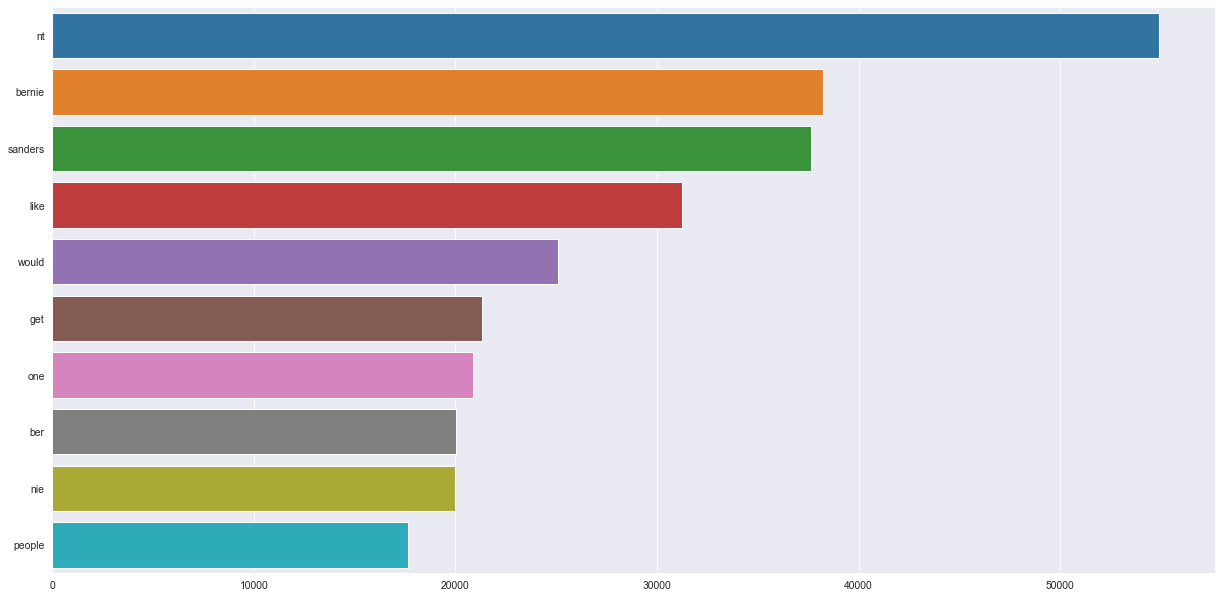

In [118]:
plot_top_n(preprocessed_data,"text_without_stopwords",10,1)

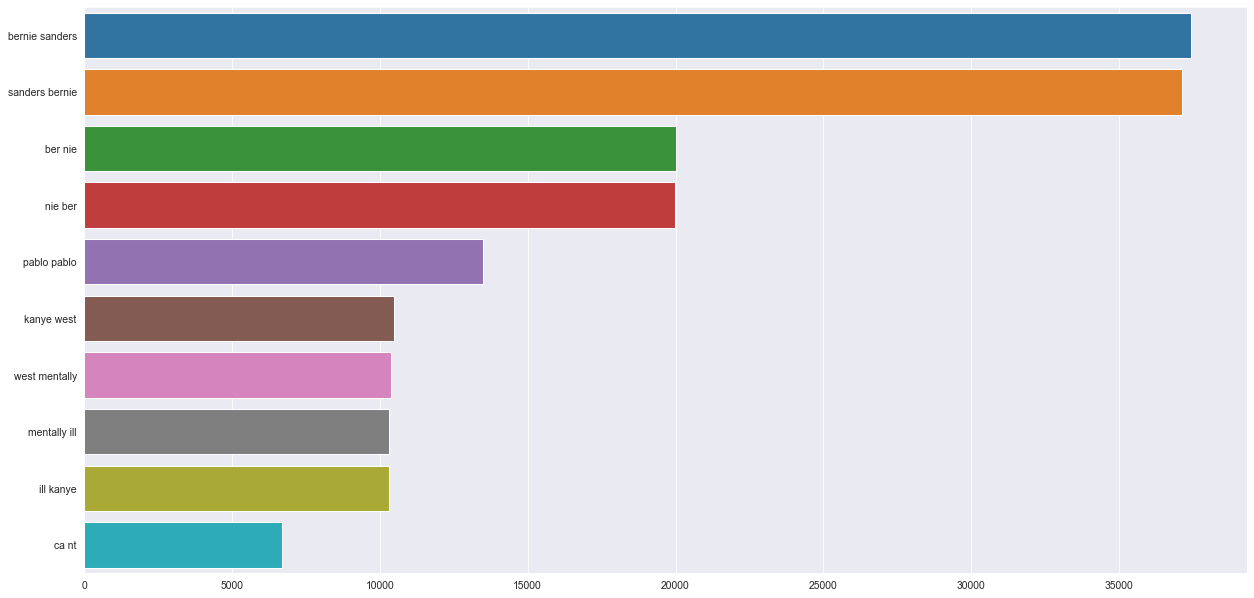

In [119]:
plot_top_n(preprocessed_data,"text_without_stopwords",10,2)

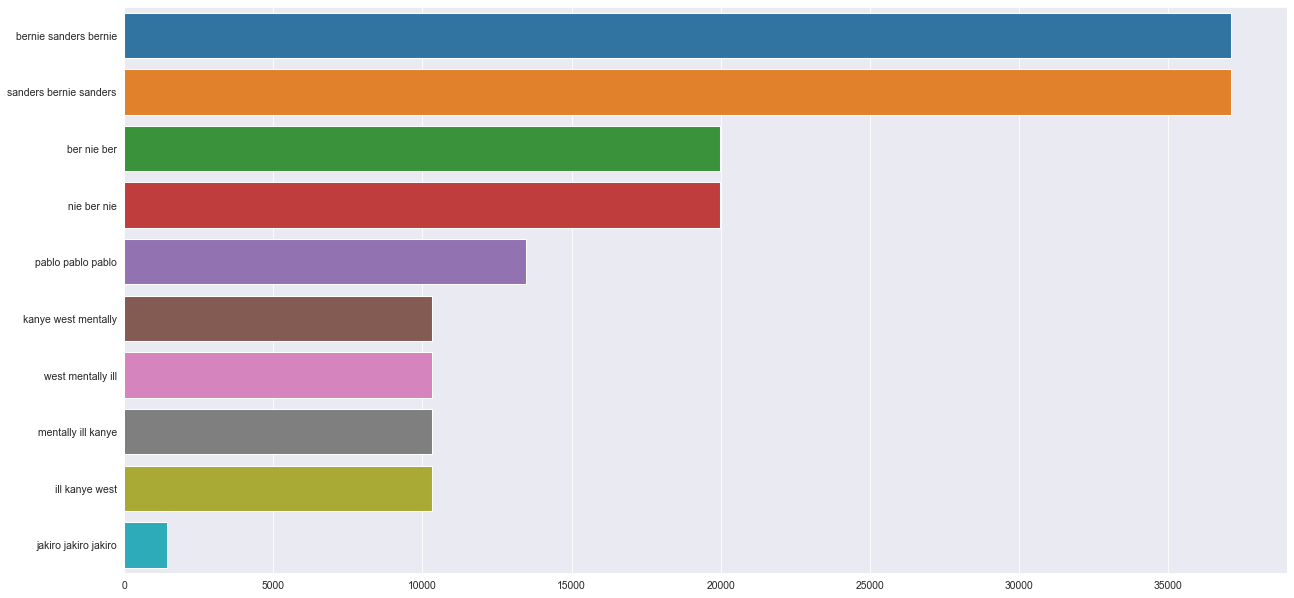

In [120]:
plot_top_n(preprocessed_data,"text_without_stopwords",10,3)

Looks like the dataset is infested with some troll sentences.

In [121]:
def row_idx_with_certain_text(data,col,text):
    '''
    data:DataFrame
    col:Column Name
    text:Certain text where if a row has it, return its index
    
    '''
    df = data.copy()
    
    idx_list = []
    for idx,row in zip(df[col].index,df[col]):
        if text in row:
            idx_list.append(idx)

    return idx_list
        

In [122]:
bernie_sanders_bernie_idx = row_idx_with_certain_text(preprocessed_data,"text_without_stopwords","bernie sanders bernie") 
ber_nie_idx = row_idx_with_certain_text(preprocessed_data,"text_without_stopwords","ber nie")
pablo_idx = row_idx_with_certain_text(preprocessed_data,"text_without_stopwords","pablo pablo")
kanye_idx = row_idx_with_certain_text(preprocessed_data,"text_without_stopwords","kanye west mentally")
kill_idx = row_idx_with_certain_text(preprocessed_data,"text_without_stopwords","kill kill kill")
all_idx = list(set(bernie_sanders_bernie_idx + ber_nie_idx + pablo_idx + kanye_idx + kill_idx))

In [127]:
preprocessed_data.iloc[kanye_idx]["text_without_stopwords"]

10491     kanye west mentally ill kanye west mentally il...
31767     kanye west mentally ill kanye west mentally il...
50601     kanye west mentally ill kanye west mentally il...
68842     kanye west mentally ill kanye west mentally il...
138047    kanye west mentally ill kanye west mentally il...
168089    kanye west mentally ill kanye west mentally il...
214821    kanye west mentally ill kanye west mentally il...
Name: text_without_stopwords, dtype: object

In [128]:
preprocessed_data.iloc[bernie_sanders_bernie_idx[:5]]["text_without_stopwords"]

484      bernie sanders bernie sanders bernie sanders b...
7585     bernie sanders bernie sanders bernie sanders b...
24260    bernie sanders bernie sanders bernie sanders b...
27116    bernie sanders bernie sanders bernie sanders b...
40217    sernie banders bernie sanders bernie sanders b...
Name: text_without_stopwords, dtype: object

In [129]:
preprocessed_data.iloc[ber_nie_idx[:5]]["text_without_stopwords"]

11266    ber nie ber nie ber nie ber nie ber nie ber ni...
12756    ber nie ber nie ber nie ber nie ber nie ber ni...
16849    ber nie ber nie ber nie ber nie ber nie ber ni...
23300    ber nie ber nie ber nie ber nie ber nie ber ni...
27125    ber nie ber nie ber nie ber nie ber nie ber ni...
Name: text_without_stopwords, dtype: object

In [130]:
preprocessed_data.iloc[pablo_idx[:5]]["text_without_stopwords"]

25048    pablo pablo pablo pablo pablo pablo pablo pabl...
35495    pablo pablo pablo pablo pablo pablo pablo pabl...
49511    pablo pablo pablo pablo pablo pablo pablo pabl...
85656    pablo pablo pablo pablo pablo pablo pablo pabl...
89235    pablo pablo pablo pablo pablo pablo pablo pabl...
Name: text_without_stopwords, dtype: object

We can see that these sentences don't mean anything so we can remove them.

In [131]:
preprocessed_data = preprocessed_data.drop(all_idx)
preprocessed_data.reset_index(drop=True,inplace=True)

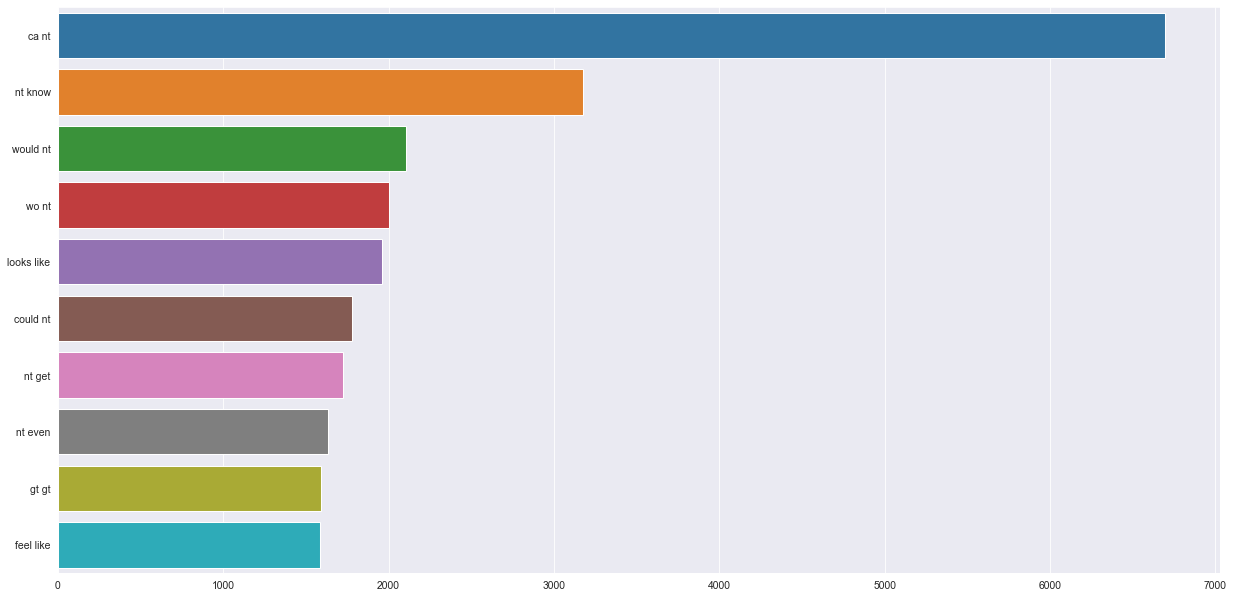

In [132]:
plot_top_n(preprocessed_data,"text_without_stopwords",10,2)

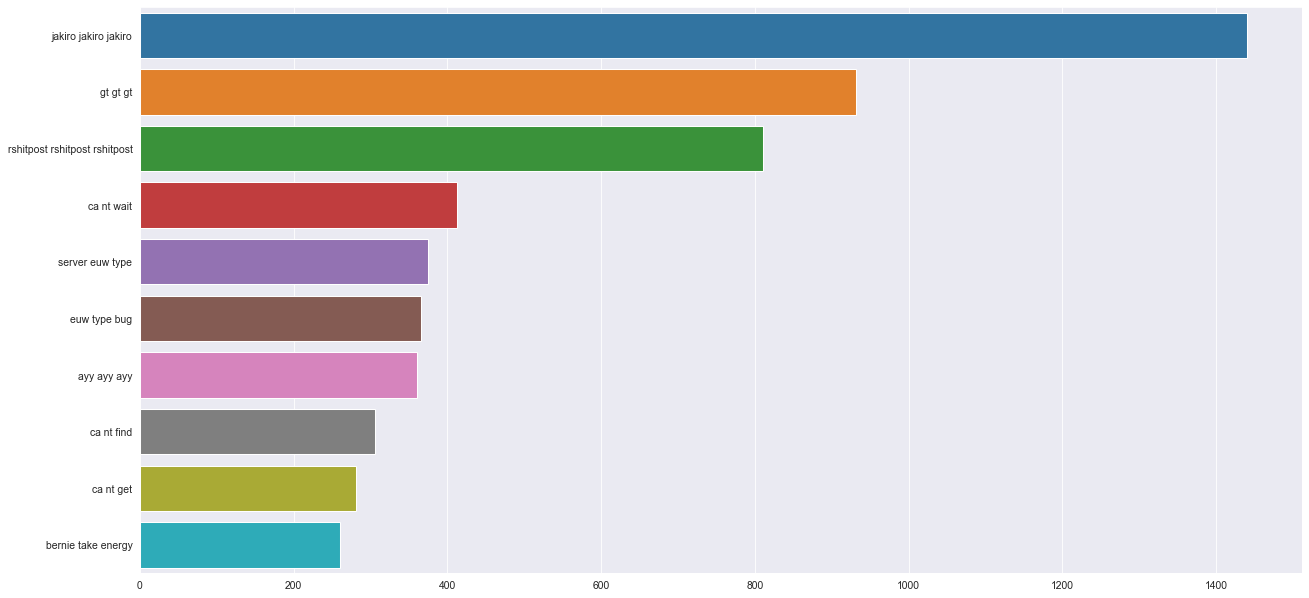

In [133]:
plot_top_n(preprocessed_data,"text_without_stopwords",10,3)

Data still is not very clean.

<a name="2-4"></a>
### 2.4 - TF(Term Frequency) - IDF(Inverse Document Frequency) (15 points)

- Explain TF & IDF 
- Apply TF & IDF methods


Term Frequency is basically how much a certain word appears in a document with respect to total count of words.

Inverse Document Frequency is showing us how rare or unique a word is in the document

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(preprocessed_data.text_without_stopwords)

In [137]:
k = 0

feat_names = tfidf.get_feature_names_out()

idf_df = pd.DataFrame([feat_names,tfidf.idf_]).T
idf_df.columns = ["Words","IDF"]

In [35]:
idf_df.sort_values("IDF",ascending=True)

,Words,IDF
21254,nt,2.78986
18127,like,3.197942
34175,would,3.523868
21640,one,3.573046
13500,get,3.603758
...,...,...
13501,geta,12.65873
20734,nerfssuper,12.65873
6035,champagne,12.65873
9974,dreamboys,12.65873


<a name="2-5"></a>
### 2.5 - Train/Test Split (5)

- Target preparation
- Split the data


In [138]:

from sklearn.model_selection import train_test_split

In [139]:
final_data = preprocessed_data["text_without_stopwords"] +" " + preprocessed_data["subreddit"]
X_train, X_test, y_train, y_test = train_test_split(final_data,preprocessed_data["meta"],test_size=0.05,random_state=42)


In [140]:
cv = CountVectorizer(max_features=5000)
X_train_transformed = cv.fit_transform(X_train).astype("int8").toarray()
X_test_transformed = cv.transform(X_test).astype("int8").toarray()

In [141]:
y_train = pd.get_dummies(y_train, dtype=int)
y_test = pd.get_dummies(y_test, dtype=int)
test_labels = y_test.columns

print(test_labels)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Index(['gaming', 'humor', 'learning'], dtype='object')


<a name="3"></a>
## 3 - Training Deep Learning Models (30 points)


- Import relevant libraries
- Please explain difference between NN and CNN.

<a name="3.1"></a>
## 3.1 - Training NN models


- Construct NN models from basic one (exp. with one layer) to complex (more layer included).
- Use different optimizers, regularization methods, drop-out, normalization etc.
- Evaluate in test data for different trials

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, Activation,InputLayer
from tensorflow.keras.optimizers import Adam

In [161]:
nn_model  = Sequential()
nn_model.add(Input(shape=(X_train_transformed.shape[1],)))
nn_model.add(Dense(100,activation="relu"))
nn_model.add(Dense(y_train.shape[1],activation="softmax"))

In [162]:
nn_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [163]:
nn_model.fit(X_train_transformed, y_train, epochs=5, batch_size=256, verbose=2)

Epoch 1/5
859/859 - 9s - loss: 1.0549 - accuracy: 0.5844 - 9s/epoch - 11ms/step
Epoch 2/5
859/859 - 10s - loss: 0.9364 - accuracy: 0.8110 - 10s/epoch - 11ms/step
Epoch 3/5
859/859 - 10s - loss: 0.7983 - accuracy: 0.9245 - 10s/epoch - 11ms/step
Epoch 4/5
859/859 - 10s - loss: 0.6613 - accuracy: 0.9717 - 10s/epoch - 11ms/step
Epoch 5/5
859/859 - 9s - loss: 0.5414 - accuracy: 0.9861 - 9s/epoch - 11ms/step


<a name="4"></a>
## 4 - Testing with your Own Input (5 points)


- Finally you will test with your own input.

In [235]:
def predict(model,vectorizer,sentence):
    
    preprocessed_sentence = preprocess_data(sentence,string=True)

    transformed_sentence = vectorizer.transform([sentence]).astype("int8").toarray()


    preds = model.predict(transformed_sentence)

    

    return preds , test_labels[np.argmax(preds)]

In [236]:
predict(nn_model,cv,"As far as I'm concerned, this year's return will be significantly higher in this type of economy")

1/1 [==============================] - 0s 33ms/step


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAGUDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(array([[0.35366797, 0.2779847 , 0.36834738]], dtype=float32), 'learning')

In [239]:

humor_sentence = "Here is a joke for you, knock knock" # write a sentence for each class
gaming_sentence = "I think league of legends is going to pop off this year."
learning_sentence = "As far as I'm concerned, this year's return will be significantly higher in this type of economy"

for sentence in [humor_sentence,gaming_sentence,learning_sentence]:
    tmp_pred, tmp_sentiment = predict(nn_model,cv,sentence)
    print(f"The sentiment of the sentence \n***\n\"{sentence}\"\n***\nis {tmp_sentiment}.")

1/1 [==============================] - 0s 27ms/step
The sentiment of the sentence 
***
"Here is a joke for you, knock knock"
***
is humor.
1/1 [==============================] - 0s 27ms/step
The sentiment of the sentence 
***
"I think league of legends is going to pop off this year."
***
is gaming.
1/1 [==============================] - 0s 26ms/step
The sentiment of the sentence 
***
"As far as I'm concerned, this year's return will be significantly higher in this type of economy"
***
is learning.


<a name="5"></a>
## 5 - BONUS - Training CNN Models (20 points)

- Construct CNN models from basic one (exp. with one layer) to complex (more layer included).
- Use different optimizers, regularization methods, drop-out, normalization etc.
- Evaluate in test data for different trials